In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('../datasets/Social_Network_Ads.csv')

df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

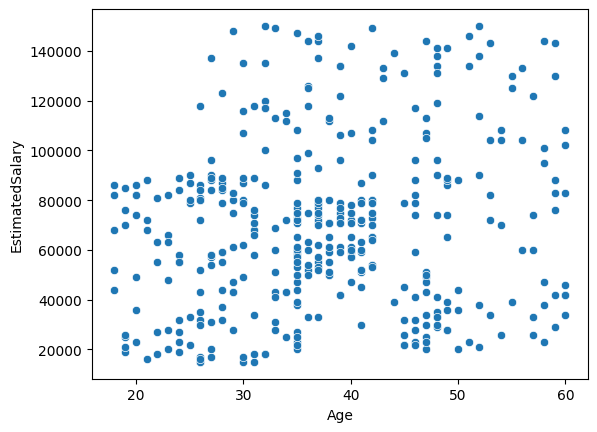

In [8]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

In [9]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 32ms/step - loss: 912.9028 - accuracy: 0.5406 - val_loss: 1074.5408 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 498.7799 - accuracy: 0.5344 - val_loss: 443.1097 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 247.2898 - accuracy: 0.5969 - val_loss: 144.6123 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 143.2941 - accuracy: 0.5281 - val_loss: 155.5568 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 110.0211 - accuracy: 0.5281 - val_loss: 106.1671 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 54.4443 - accuracy: 0.4938 - val_loss: 43.3429 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 50.6596 - accuracy: 0.5250 - val_loss: 123.1726 - val_acc

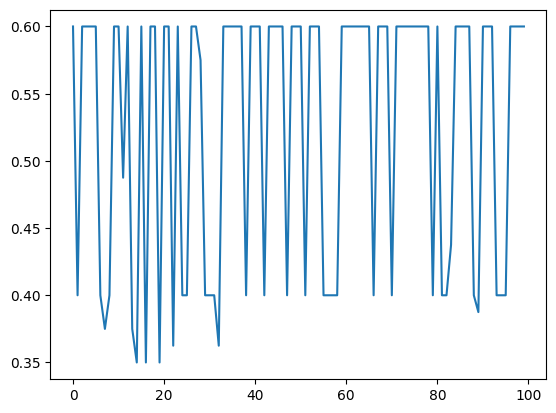

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## Applying scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [19]:
sns.scatterplot(X_train_scaled[:, 0], X_train_scaled[:, 1])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(
    X_test_scaled, y_test), epochs=100)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])